In [ ]:
#importing library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#load data
df = pd.read_csv('/content/job_skills.csv')
df

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...
1,Google,"Supplier Development Engineer (SDE), Cable/Con...",Manufacturing & Supply Chain,"Shanghai, China",Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin..."
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...
3,Google,"Developer Advocate, Partner Engineering",Developer Relations,"Mountain View, CA, United States","Work one-on-one with the top Android, iOS, and...",BA/BS degree in Computer Science or equivalent...,"Experience as a software developer, architect,..."
4,Google,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Sunnyvale, CA, United States",Plan requirements with internal customers.\nPr...,BA/BS degree or equivalent practical experienc...,CTS Certification.\nExperience in the construc...
...,...,...,...,...,...,...,...
1245,Google,Global Investigator,Real Estate & Workplace Services,"Boulder, CO, United States",Develop protocols and practices to assess and ...,BA/BS degree or equivalent practical experienc...,Investigative or Interview certification throu...
1246,Google,Campus Security Manager,Real Estate & Workplace Services,"Boulder, CO, United States",Manage the daily operations of the security ve...,BA/BS degree or equivalent practical experienc...,Master’s degree.\nProficient in the use of com...
1247,Google,Facilities Manager,Real Estate & Workplace Services,"Xinyi District, Taiwan",Collaborate with functional teams; plan and ma...,BA/BS degree or equivalent practical experienc...,Experience managing outsourced facilities serv...
1248,Google,Physical Security Manager,Real Estate & Workplace Services,"Tel Aviv-Yafo, Israel",Partner closely with and offer guidance and co...,BA/BS degree or equivalent practical experienc...,Experience working on international programs.\...


In [ ]:
df.head(10)

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...
1,Google,"Supplier Development Engineer (SDE), Cable/Con...",Manufacturing & Supply Chain,"Shanghai, China",Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin..."
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...
3,Google,"Developer Advocate, Partner Engineering",Developer Relations,"Mountain View, CA, United States","Work one-on-one with the top Android, iOS, and...",BA/BS degree in Computer Science or equivalent...,"Experience as a software developer, architect,..."
4,Google,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Sunnyvale, CA, United States",Plan requirements with internal customers.\nPr...,BA/BS degree or equivalent practical experienc...,CTS Certification.\nExperience in the construc...
5,Google,"Associate Account Strategist (Czech/Slovak), G...",Technical Solutions,"Dublin, Ireland",Communicate with customers via phone and email...,Bachelor's degree or equivalent practical expe...,"Experience in sales, customer service, account..."
6,Google,"Supplier Development Engineer, Camera, Consume...",Hardware Engineering,"Mountain View, CA, United States",Manage cross-functional activities in the supp...,BS degree in Engineering or equivalent practic...,Master's degree.\nExperience in the developmen...
7,Google,"Strategic Technology Partner Manager, Healthca...",Partnerships,"Sunnyvale, CA, United States",Lead the development and strategy with partner...,BA/BS degree or equivalent practical experienc...,"BA/BS degree in a technical, life sciences or ..."
8,Google,"Manufacturing Business Manager, Google Hardware",Manufacturing & Supply Chain,"Xinyi District, Taiwan",Develop CM/ODM strategy and implement supplier...,"BA/BS degree in Engineering, Supply Chain or e...",MBA degree.\nExperience in procurement and sup...
9,Google,"Solutions Architect, Healthcare and Life Scien...",Technical Solutions,"New York, NY, United States",Help compile customer requirements as well as ...,"BA/BS degree in Computer Science, related Soft...","Master's degree in Computer Science, related E..."


In [ ]:
df.shape

(1250, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Company                   1250 non-null   object
 1   Title                     1250 non-null   object
 2   Category                  1250 non-null   object
 3   Location                  1250 non-null   object
 4   Responsibilities          1235 non-null   object
 5   Minimum Qualifications    1236 non-null   object
 6   Preferred Qualifications  1236 non-null   object
dtypes: object(7)
memory usage: 68.5+ KB


In [ ]:
#modify the column name Of Minimum Qualification
df = df.rename(columns={'Minimum Qualifications': 'Minimum_Qualifications', 'Preferred Qualifications': 'Preferred_Qualifications'})

In [ ]:
#Select Columns "Minimum Qualification"
df.loc[:,df.columns.str.contains("Minimum_Qualification")]

,Minimum_Qualifications
0,BA/BS degree or equivalent practical experienc...
1,BS degree in an Engineering discipline or equi...
2,"Bachelor’s degree in Business, Economics, Stat..."
3,BA/BS degree in Computer Science or equivalent...
4,BA/BS degree or equivalent practical experienc...
...,...
1245,BA/BS degree or equivalent practical experienc...
1246,BA/BS degree or equivalent practical experienc...
1247,BA/BS degree or equivalent practical experienc...
1248,BA/BS degree or equivalent practical experienc...


In [ ]:
# cheking the null values in the dataset
df.isnull().any()

Company                     False
Title                       False
Category                    False
Location                    False
Responsibilities             True
Minimum_Qualifications       True
Preferred_Qualifications     True
dtype: bool

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(1235, 7)

In [ ]:
#define many company have 
df.Company.value_counts()

Google     1212
YouTube      23
Name: Company, dtype: int64

In [ ]:
#define many job have
df.Title.value_counts()

Business Intern 2018                                                        35
MBA Intern, Summer 2018                                                     34
MBA Intern 2018                                                             28
BOLD Intern, Summer 2018                                                    21
Field Sales Representative, Google Cloud                                    17
                                                                            ..
App Specialist LCS (CEE), App Developer Sales, EMEA (Multiple Languages)     1
Global Supply Chain Manager, Power, Consumer Hardware                        1
Partner Marketing Manager, Google Cloud                                      1
Business Development Manager, Google Cloud Partnerships                      1
Associate Account Strategist (Czech/Slovak), Global Customer Experience      1
Name: Title, Length: 779, dtype: int64

In [ ]:
#define many location have
df.Location.value_counts()

Mountain View, CA, United States    187
Sunnyvale, CA, United States        155
Dublin, Ireland                      87
New York, NY, United States          70
London, United Kingdom               62
                                   ... 
Minneapolis, MN, United States        1
Prague, Czechia                       1
Zagreb, Croatia                       1
Portland, OR, United States           1
Madrid, Spain                         1
Name: Location, Length: 91, dtype: int64

In [ ]:
#define many departemen have
df.Category.value_counts()

Sales & Account Management          168
Marketing & Communications          165
Finance                             115
Technical Solutions                 100
Business Strategy                    98
People Operations                    86
User Experience & Design             84
Program Management                   72
Partnerships                         59
Product & Customer Support           50
Legal & Government Relations         46
Administrative                       40
Sales Operations                     31
Real Estate & Workplace Services     25
Software Engineering                 24
Hardware Engineering                 22
Manufacturing & Supply Chain         16
Technical Infrastructure             11
Network Engineering                   6
Developer Relations                   5
Technical Writing                     5
IT & Data Management                  5
Data Center & Network                 2
Name: Category, dtype: int64

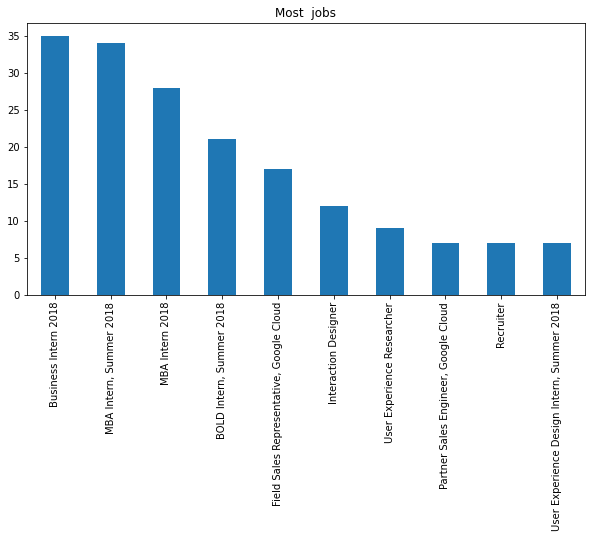

In [ ]:
#Find most populer job 
jobs = df['Title'].value_counts()
jobs = pd.DataFrame(jobs)
jobs.head(10).plot.bar(legend='', figsize=(10,5),title='Most  jobs')
plt.show()

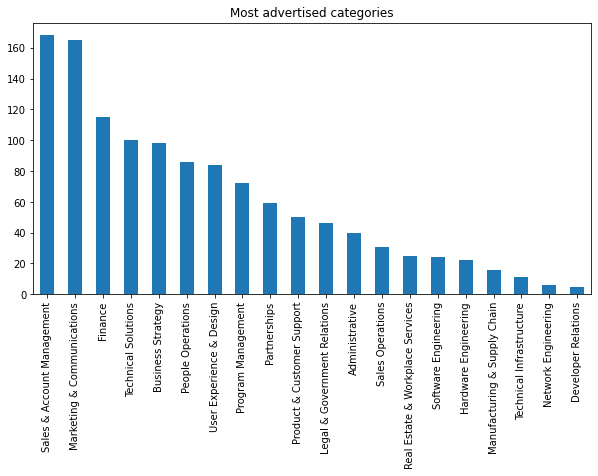

In [ ]:
#Find categorical numbers that they position
category = df['Category'].value_counts()
category = pd.DataFrame(category)
category.head(20).plot.bar(legend='', figsize=(10,5), title='Most advertised categories')
plt.show()

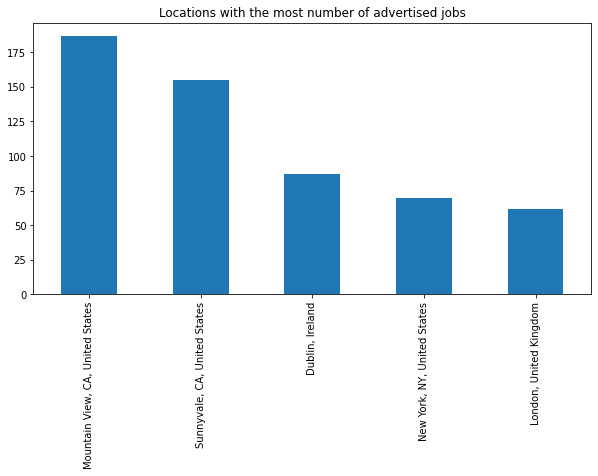

In [ ]:
#Find most populer location 
location = df['Location'].value_counts()
location = pd.DataFrame(location)
location.head(5).plot.bar(legend='', figsize=(10,5), title='Locations with the most number of advertised jobs')
plt.show()

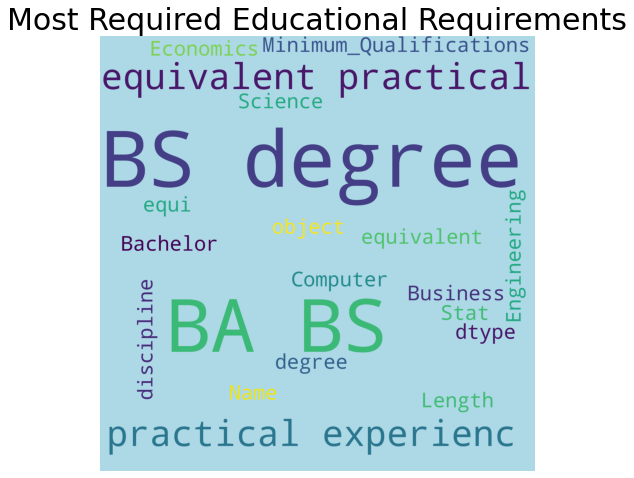

In [ ]:
# checking the most popular Minimum edu. requirements

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'lightblue',
                      max_words = 150,
                      width = 2000,
                      height = 2000).generate(str(df['Minimum_Qualifications']))

plt.rcParams['figure.figsize'] = (12, 8)
plt.axis('off')
plt.imshow(wordcloud)
plt.title('Most Required Educational Requirements', fontsize = 30)
plt.show()

In [ ]:
#Extract degree requitment from each rows
import seaborn as sns
degree = ["BA","BS", "BA/BS", "Bachelor" ]
degree = dict((x,0) for x in degree)
for i in degree:
    x = df['Minimum_Qualifications'].str.contains(i).sum()
    if i in degree:
        degree[i] = x
        
print(degree)

{'BA': 908, 'BS': 878, 'BA/BS': 834, 'Bachelor': 164}


In [ ]:
degree = sorted(degree.items(), key=lambda x: x[1], reverse=True)
degree = pd.DataFrame(degree,columns=['Degree','Count'])
degree['Count'] = degree.Count.astype('int')
degree

,Degree,Count
0,BA,908
1,BS,878
2,BA/BS,834
3,Bachelor,164


Text(0.5, 0, 'Degree')

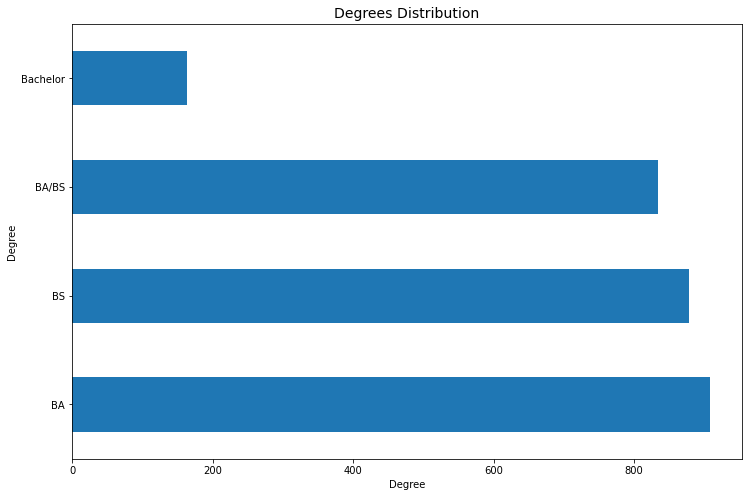

In [ ]:
#Find Degrees Distribution
degree.plot.barh(x='Degree',y='Count',legend=False)
plt.title('Degrees Distribution',fontsize=14)
plt.xlabel('Degree')

In [ ]:
# The way to extract year 
import re
df['Minimum_years_experience'] = df['Minimum_Qualifications'].apply(lambda x : re.findall(r'([0-9]+) year',x))
# Fill empty list with [0]
df['Minimum_years_experience'] = df['Minimum_years_experience'].apply(lambda y : [0] if len(y)==0 else y)
#Then extract maximum in the list to have the work experience requirement
df['Minimum_years_experience'] = df['Minimum_years_experience'].apply(lambda z : max(z))
df['Minimum_years_experience'] = df.Minimum_years_experience.astype(int)

In [ ]:
df.head(3)

,Company,Title,Category,Location,Responsibilities,Minimum_Qualifications,Preferred_Qualifications,Minimum_years_experience
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...,3
1,Google,"Supplier Development Engineer (SDE), Cable/Con...",Manufacturing & Supply Chain,"Shanghai, China",Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin...",7
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...,2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0.98, 'Minimum work experience')

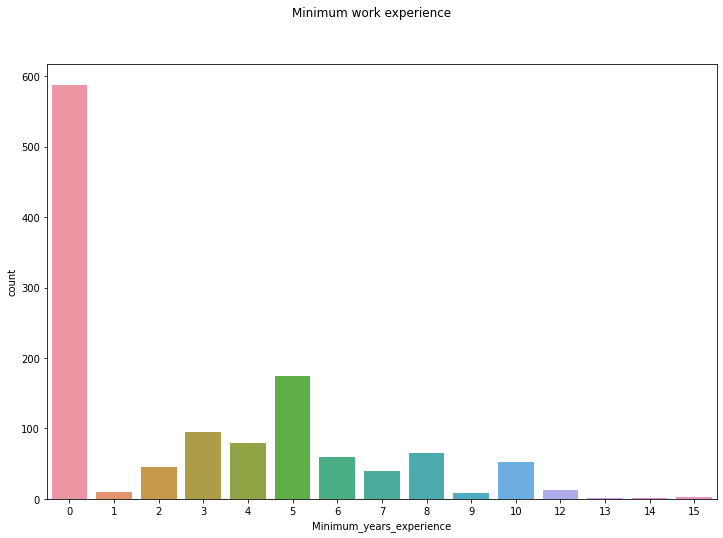

In [ ]:
#Find Minimum work experience 
import seaborn as sns
sns.countplot('Minimum_years_experience',data=df)
plt.suptitle('Minimum work experience')